#Content
- 1 Python Libraries

- 2 Data Content

- 3 Read and Analyse Data

- 4 Dependent Variable Analysis

- 5 Correlation Between Features

- 6 Distribution of Features

- 7 Preprocessing: Missing Value Problem

- 8 Preprocessing: Train-Test Split and Normalization

- 9 Modelling: comparing models

- 10 Metrics Accuracy, Precision, Recall, F1, MSE

- 11 Nonparametric statistics

- 12 Conclusion


##Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For Preprocessing
from sklearn.preprocessing import StandardScaler

####################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Machine Learning Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## To evaluate models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv('D:/Anderson/Downloads/data/train_diabetes.csv')

D:\app\anaconda3\envs\py39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


##DATA CONTENT

Columns Description:
numero ID de la persona
Number of times pregnant
Plasma glucose concentration 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Class variable (0 or 1)

guide: https://www.kaggle.com/code/alibabaei78/diabetesclassificationproject
repetir el video de inteligencia: https://tecnoutb.sharepoint.com/sites/INTELIGENCIAARTIFICIAL-1944-202210/Documentos%20compartidos/Forms/AllItems.aspx?id=%2Fsites%2FINTELIGENCIAARTIFICIAL%2D1944%2D202210%2FDocumentos%20compartidos%2FGeneral%2FRecordings%2FReuni%C3%B3n%20en%20%5FGeneral%5F%2D20220407%5F072231%2DGrabaci%C3%B3n%20de%20la%20reuni%C3%B3n%2Emp4&parent=%2Fsites%2FINTELIGENCIAARTIFICIAL%2D1944%2D202210%2FDocumentos%20compartidos%2FGeneral%2FRecordings

DATA ANALISIS
Como estan compuesto el data set


In [60]:
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [2]:
data = data.drop(columns=['p_id'])
rows, columns = data.shape
print('Rows--> ', rows)
print('Columns--> ', columns)

Rows-->  614
Columns-->  9


In [62]:

data.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [63]:
d = pd.DataFrame(data["diabetes"].value_counts())
fig = px.pie(d, values = "diabetes", names = ["no diabetes", "diabetes"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"diabetes","diabetes":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

##Dependent Variable Analaysis
probar la depencia de las varaibles y si cumplen con los requisitos de normalización

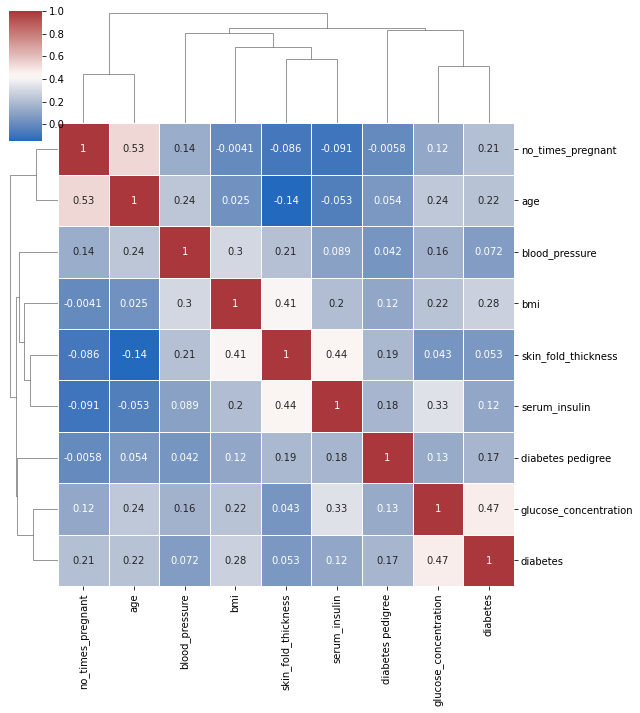

In [64]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

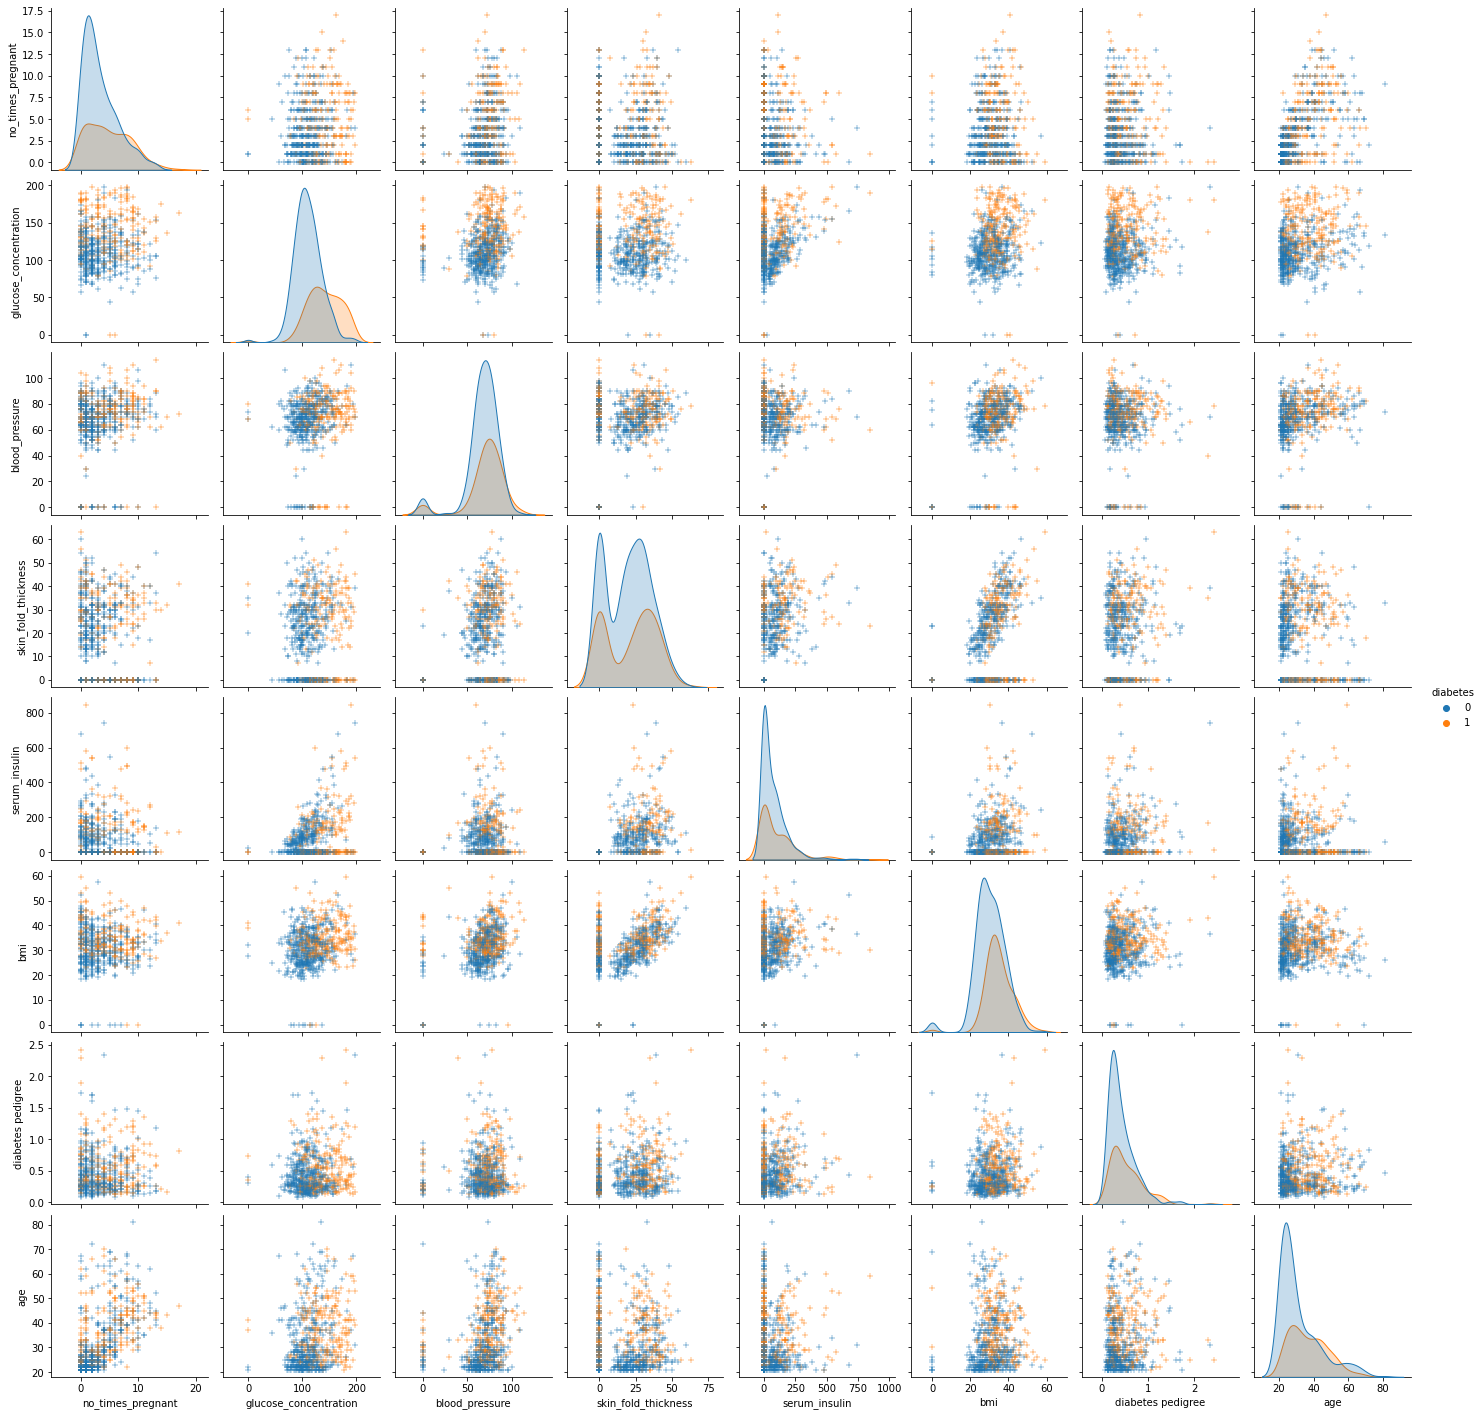

In [65]:
g = sns.pairplot(data, hue='diabetes', markers='+')
plt.show()

#Preprocessing:

In [6]:
y = data['diabetes'].values

X = data.drop(columns='diabetes', axis=1, inplace=True)

scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

KeyError: 'diabetes'

In [7]:
X.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,-0.552371,-0.273558,-0.038469,0.110608,0.124517,0.273718,-0.457475,-0.614583
1,2.129880,0.719178,1.268155,0.803603,0.566641,0.586172,-0.641865,1.482759
2,-0.552371,-0.882009,-0.239488,0.740603,0.685674,0.761146,0.627706,-0.866264
3,-0.850399,-0.017368,0.564589,1.748595,1.025770,0.873630,2.102825,0.643822
4,-0.254343,0.238822,0.162550,0.299607,0.940746,0.061249,0.249857,-0.530689


In [8]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [9]:
# train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)
print("X_train",Xtrain.shape)
print("X_test",Xtest.shape)
print("y_train",ytrain.shape)
print("y_test",ytest.shape)

X_train (429, 8)
X_test (185, 8)
y_train (429,)
y_test (185,)
